In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib nbagg

import time
import numpy as np
import matplotlib.pyplot as plt

from robmob.icp import icp
from robmob.robot import Robot
from robmob.sensors import HokuyoSensor

In [2]:
robot = Robot('192.168.0.108')
robot.connect()

In [3]:
hokuyo = HokuyoSensor()
robot.add_sensor(hokuyo)

In [4]:
def hokuyo_to_3d_homogeneous_matrix(hokuyo_data):
    ranges = np.array(hokuyo_data['ranges'])
    thetas = np.arange(hokuyo_data['angle_min'], hokuyo_data['angle_max']+hokuyo_data['angle_increment'], hokuyo_data['angle_increment'])
    xs = ranges * np.cos(thetas)
    ys = ranges * np.sin(thetas)
    
    pts = np.vstack((xs, ys, np.zeros(xs.shape), np.ones(xs.shape))).T
    
    # Remove the points that are at the origin.
    pts = pts[np.nonzero(np.logical_or(pts[:,0] != 0., pts[:,1] != 0.))]
    
    return pts

In [42]:
def plot_point_clouds(pcls):
    STYLES = ['r+', 'bx']
    
    for i, pcl in enumerate(pcls):
        plt.plot(pcl[:,0], pcl[:,1], STYLES[i], [0.0], [0.0], 'ko')
        
    plt.axis('equal')
    
    plt.show()

In [38]:
reading1 = hokuyo.peek_data()
pcl1 = hokuyo_to_3d_homogeneous_matrix(reading1)

In [39]:
reading2 = hokuyo.peek_data()
pcl2 = hokuyo_to_3d_homogeneous_matrix(reading2)

In [40]:
H, errs = icp(pcl1, pcl2)

(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)


In [33]:
np.average(errs)

0.0086902811814279033

<IPython.core.display.Javascript object>


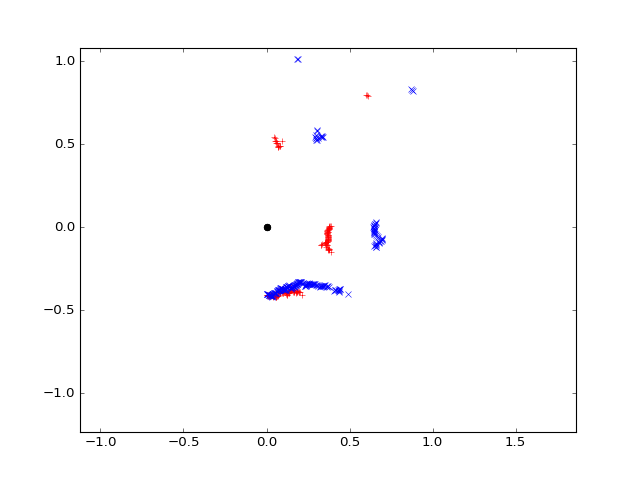

In [43]:
plot_point_clouds([pcl1, pcl2])

In [44]:
H, errs = icp(pcl1, pcl2)

(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)
(403, 3)


In [48]:
H

array([[ 0.99362949, -0.11269619,  0.        ,  0.37903375],
       [ 0.11269619,  0.99362949,  0.        , -0.08882191],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [67]:
moved_pcl = pcl1.dot(H)
moved_pcl = [row / row[3] for row in moved_pcl]

In [68]:
moved_pcl

[array([-0.04458192, -0.39307354,  0.        ,  1.        ]),
 array([-0.04213049, -0.39297839,  0.        ,  1.        ]),
 array([-0.03968203, -0.39286917,  0.        ,  1.        ]),
 array([-0.03758604, -0.39643145,  0.        ,  1.        ]),
 array([-0.03487589, -0.39352917,  0.        ,  1.        ]),
 array([-0.03250676, -0.39429587,  0.        ,  1.        ]),
 array([-0.03019934, -0.39596354,  0.        ,  1.        ]),
 array([-0.02761535, -0.39394687,  0.        ,  1.        ]),
 array([-0.02517477, -0.39375154,  0.        ,  1.        ]),
 array([-0.0227377 , -0.39354238,  0.        ,  1.        ]),
 array([-0.02039842, -0.39514421,  0.        ,  1.        ]),
 array([-0.01787438, -0.39308273,  0.        ,  1.        ]),
 array([-0.01544826, -0.39283234,  0.        ,  1.        ]),
 array([-0.01302594, -0.3925683 ,  0.        ,  1.        ]),
 array([-0.01085242, -0.40134964,  0.        ,  1.        ]),
 array([-0.00828749, -0.39652411,  0.        ,  1.        ]),
 array([

In [70]:
plot_point_clouds([moved_pcl, pcl2])

TypeError: list indices must be integers, not tuple